**Importing the necessary libraries**

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

**Load the dataset and dropping User ID column**

In [37]:
file_path = 'user_data.csv'
data = pd.read_csv(file_path)
print("Dataset Preview:")
print(data.head())
print("After Dropping the Dataset Table")
data = data.drop(columns=["User ID"])
print(data.head())

Dataset Preview:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
After Dropping the Dataset Table
   Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0


**Encoding and features splitting**

In [34]:
# Encode the 'Gender' column
labelencoder = LabelEncoder()
data['Gender'] = labelencoder.fit_transform(data['Gender'])

# Split features and target variable
X = data[['Gender', 'Age', 'EstimatedSalary']].values
y = data['Purchased'].values

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Naive Bayes to the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

**Confusion Matrix**

In [35]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[66  2]
 [ 7 25]]
Accuracy: 0.91


**Visualizing the Test results**

<ipython-input-36-f32af8413080>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 1], X_set[y_set == j, 2],


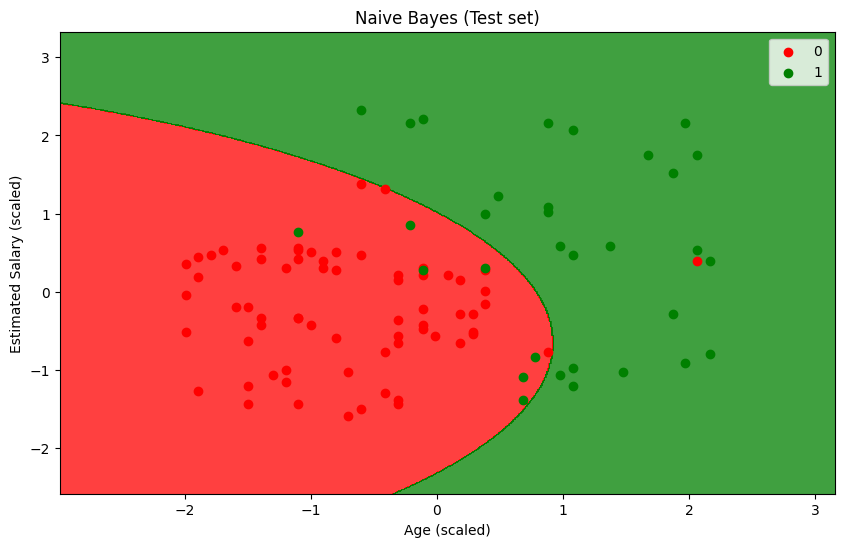

In [36]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 2].min() - 1, stop=X_set[:, 2].max() + 1, step=0.01))
plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, classifier.predict(np.array([np.ones(X1.ravel().shape), X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 1], X_set[y_set == j, 2],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.legend()
plt.show()